In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("test_images/msd7-1688674622.jpg")
img.shape

(1920, 1080, 3)

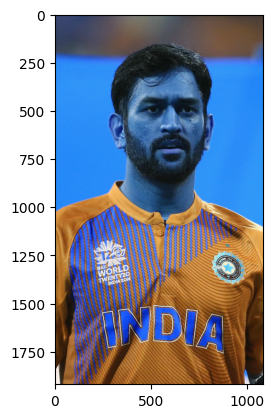

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1920, 1080)

In [5]:
gray

array([[ 85,  84,  82, ...,  58,  57,  58],
       [ 84,  82,  81, ...,  57,  57,  59],
       [ 84,  83,  82, ...,  58,  59,  60],
       ...,
       [239, 239, 239, ...,  19,  19,  20],
       [238, 239, 239, ...,  19,  21,  22],
       [238, 239, 239, ...,  20,  22,  24]], dtype=uint8)

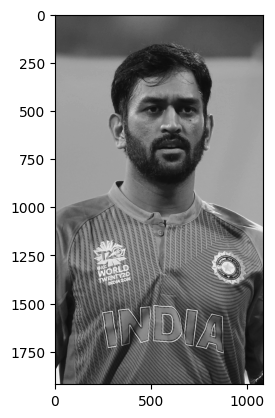

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('OpenCV/Haar-Cascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('OpenCV/Haar-Cascade/haarcascade_eye.xml')


faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces


array([[325, 277, 543, 543]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(325, 277, 543, 543)

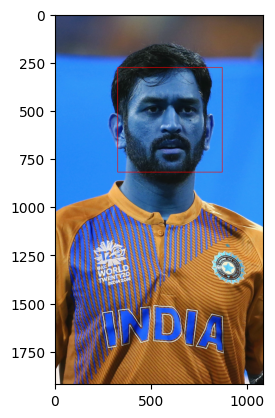

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

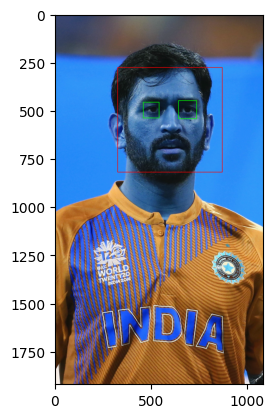

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

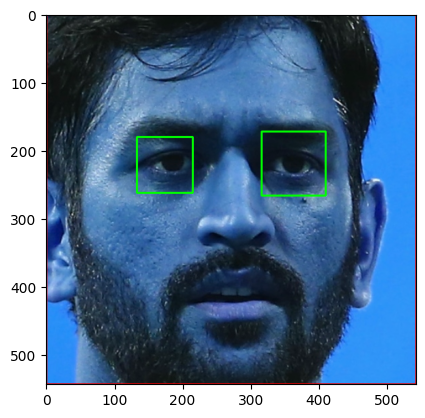

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(543, 543, 3)

In [13]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img

    # Data type conversion
    # Convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    # Convert to float
    imArray = np.float32(imArray)
    imArray /= 255

    # Compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    # Process coefficients
    coeffs_H = list(coeffs)
    #coeffs_H[0] = np.zeros_like(coeffs_H[0])  # Set approximation coefficients to zeros
    coeffs_H[0] *= 0;
    
    # Reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H

# Example usage:
# img = cv2.imread('your_image_path.jpg')
# result = w2d(img, mode='haar', level=1)
# cv2.imshow('Original', img)
# cv2.imshow('Wavelet Transformed', result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


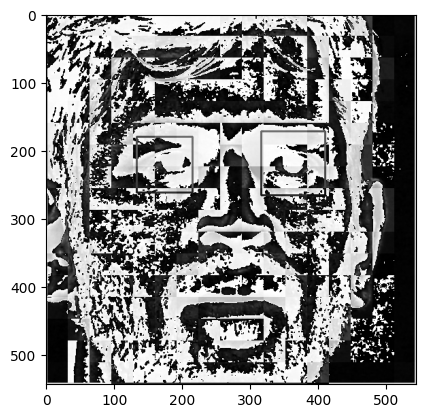

In [14]:

im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap = 'grey')


In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color
    #return None

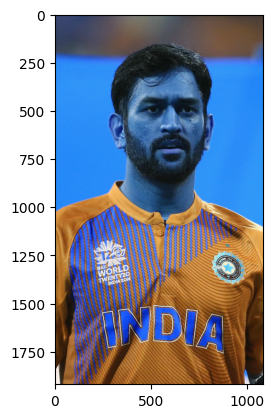

In [16]:
original_image = cv2.imread('test_images/msd7-1688674622.jpg')
plt.imshow(original_image)

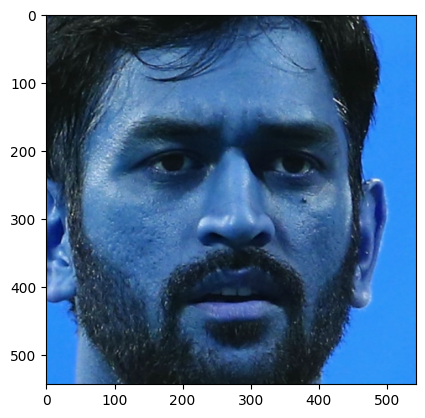

In [17]:

cropped_image = get_cropped_image_if_2_eyes('test_images/msd7-1688674622.jpg')
plt.imshow(cropped_image)

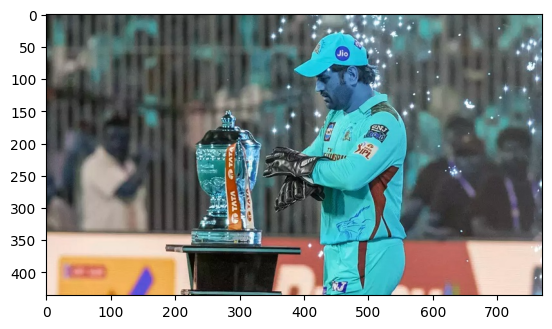

In [18]:
org_img = test_images = cv2.imread('test_images/MS-Dhoni-Makes-History-with-250th-IPL-Matches-11th-Final.jpg')
plt.imshow(org_img)

In [19]:
crop_image = get_cropped_image_if_2_eyes('test_images/MS-Dhoni-Makes-History-with-250th-IPL-Matches-11th-Final.jpg')
crop_image

In [20]:
path_to_data = "./DATA SET/"
path_to_cr_data = "./DATA SET/cropped/"

In [21]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['./DATA SET/.ipynb_checkpoints',
 './DATA SET/dhoni',
 './DATA SET/lionel messi',
 './DATA SET/maria sharapova',
 './DATA SET/ronaldo',
 './DATA SET/virat kholi']

In [23]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [24]:
#{
 #   'lionel messi':[
  #      './DATA SET/cropped/lionel messi/messi1.png',
   #     './DATA SET/cropped/lionel messi/messi2.png',
    #],
    #'virat kholi':[
     #    './DATA SET/cropped/virat kholi/virat1.png',
      #    './DATA SET/cropped/virat kholi/virat2.png',
    #]
#}

In [25]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
            

Generating cropped images in folder:  ./DATA SET/cropped/dhoni
Generating cropped images in folder:  ./DATA SET/cropped/lionel messi
Generating cropped images in folder:  ./DATA SET/cropped/maria sharapova
Generating cropped images in folder:  ./DATA SET/cropped/ronaldo


In [26]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'dhoni': ['./DATA SET/cropped/dhoni\\dhoni1.png',
  './DATA SET/cropped/dhoni\\dhoni10.png',
  './DATA SET/cropped/dhoni\\dhoni11.png',
  './DATA SET/cropped/dhoni\\dhoni12.png',
  './DATA SET/cropped/dhoni\\dhoni13.png',
  './DATA SET/cropped/dhoni\\dhoni14.png',
  './DATA SET/cropped/dhoni\\dhoni15.png',
  './DATA SET/cropped/dhoni\\dhoni16.png',
  './DATA SET/cropped/dhoni\\dhoni17.png',
  './DATA SET/cropped/dhoni\\dhoni18.png',
  './DATA SET/cropped/dhoni\\dhoni19.png',
  './DATA SET/cropped/dhoni\\dhoni2.png',
  './DATA SET/cropped/dhoni\\dhoni20.png',
  './DATA SET/cropped/dhoni\\dhoni21.png',
  './DATA SET/cropped/dhoni\\dhoni22.png',
  './DATA SET/cropped/dhoni\\dhoni23.png',
  './DATA SET/cropped/dhoni\\dhoni24.png',
  './DATA SET/cropped/dhoni\\dhoni25.png',
  './DATA SET/cropped/dhoni\\dhoni26.png',
  './DATA SET/cropped/dhoni\\dhoni27.png',
  './DATA SET/cropped/dhoni\\dhoni28.png',
  './DATA SET/cropped/dhoni\\dhoni29.png',
  './DATA SET/cropped/dhoni\\dhoni3.png',
  './

In [27]:
#celebrity_file_names_dict.pop('cropped')

In [28]:
class_dict={}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'dhoni': 0, 'lionel messi': 1, 'maria sharapova': 2, 'ronaldo': 3}

In [29]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

+
=

In [30]:
len(X[0])

4096

In [31]:
X[0]

array([[ 62],
       [ 84],
       [ 80],
       ...,
       [251],
       [153],
       [  3]], dtype=uint8)

In [32]:
y[0]

0

In [33]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [34]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(36, 4096)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7777777777777778

In [36]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.26      0.33      0.29         9
weighted avg       0.60      0.78      0.68         9



C:\Users\ytush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ytush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ytush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [37]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [38]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True)
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [39]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\ytush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ytush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ytush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,svm,0.893333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.886667,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.446667,{'logisticregression__C': 1}


In [40]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [41]:
best_estimators['svm'].score(X_test,y_test)

0.8888888888888888

In [42]:
best_clf = best_estimators['svm']

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[7, 0, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

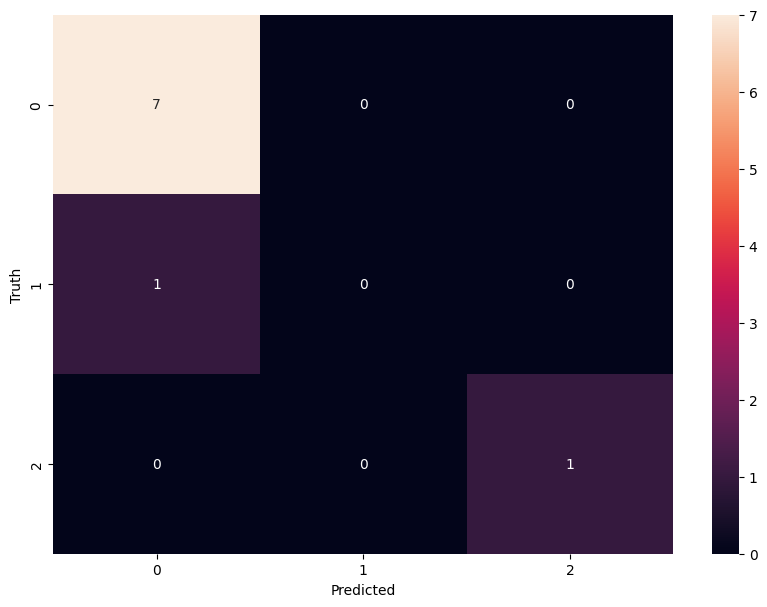

In [44]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
class_dict

{'dhoni': 0, 'lionel messi': 1, 'maria sharapova': 2, 'ronaldo': 3}

In [46]:

import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [47]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))